In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 15]

In [12]:
def A(x):
	return 0
def B(x, lamda):
	return -lamda*x
def C(x):
	return 0

def get_a(x, h):
	return 1/(h**2) - A(x)/(2.0 * h)
def get_b(x, h, lamda):
	return - 2/(h**2) + B(x, lamda)
def get_c(x, h):
	return 1/(h**2) + A(x)/(2.0 * h)

In [13]:
def ThomasAlgorithm(a, b, c, d, n):
    c_dash = np.zeros(n-1)
    d_dash = np.zeros(n-1)
    c_dash[0] = c[0] / b[0]
    d_dash[0] = d[0] / b[0]
    for itr in range(1, n-1):
        c_dash[itr] = c[itr] / (b[itr] - a[itr] * c_dash[itr-1])
        d_dash[itr] = (d[itr] - a[itr]*d_dash[itr-1]) / (b[itr] - a[itr] * c_dash[itr-1])
    
    y = np.zeros(n-1)
    y[n-2] = d_dash[n-2]
    
    for itr in reversed(range(n-2)):
        y[itr] = d_dash[itr] - c_dash[itr] * y[itr+1]
    
    return y

In [14]:
def TridiagonalBVP(x0, xn, h, n, lamda):
    x = [(x0 + itr * h) for itr in range(1, n)]
    #print x[n-1]
    a = [get_a(itr, h) for itr in x]
    b = [get_b(itr, h, lamda) for itr in x]
    c = [get_c(itr, h) for itr in x]
    d = [C(itr) for itr in x]

# 	b[0] += 4 / (2*h + 3) * a[0]
# 	c[0] += (-1) / (2*h + 3) * a[0]
    d[0] += 1*a[0]

    b[n-2] += 4 / (3 - 4*h) * c[n-2]
    a[n-2] += (-1) / (3 - 4*h) * c[n-2]
#     d[n-2] += (2*h) / (3 - 4*h) * c[n-2]

    return ThomasAlgorithm(a, b, c, d, n)

def func(x0, xn, h = 0.1):
    return np.arange(x0, xn + h, h)

[0.   0.25 0.5  0.75 1.   1.25 1.5 ]
6
[-0.6878432804057815, -0.39718166332424354, -0.13134390020047088, 0.12218037227950768, 0.39097719129442465]
[-0.6726261309425379, -0.6878432804057815, -0.39718166332424354, -0.13134390020047088, 0.12218037227950768, 0.39097719129442465]
[-0.6726261309425379, -0.6878432804057815, -0.39718166332424354, -0.13134390020047088, 0.12218037227950768, 0.39097719129442465, 0.4708641964490955]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
15
[-0.8668058200050957, -0.7353452516502014, -0.6068260643019079, -0.4819478333394258, -0.3609251850436592, -0.2435117885983292, -0.12902053361617913, -0.01633556610465557, 0.09608803234919348, 0.21024121538532803, 0.32859922272916914, 0.4541864129730519, 0.590674077128288, 0.7425192672888595]
[-0.8537118838656818, -0.8668058200050957, -0.7353452516502014, -0.6068260643019079, -0.4819478333394258, -0.3609251850436592, -0.2435117885983292, -0.12902053361617913, -0.01633556610465557, 0.09608803234919348, 

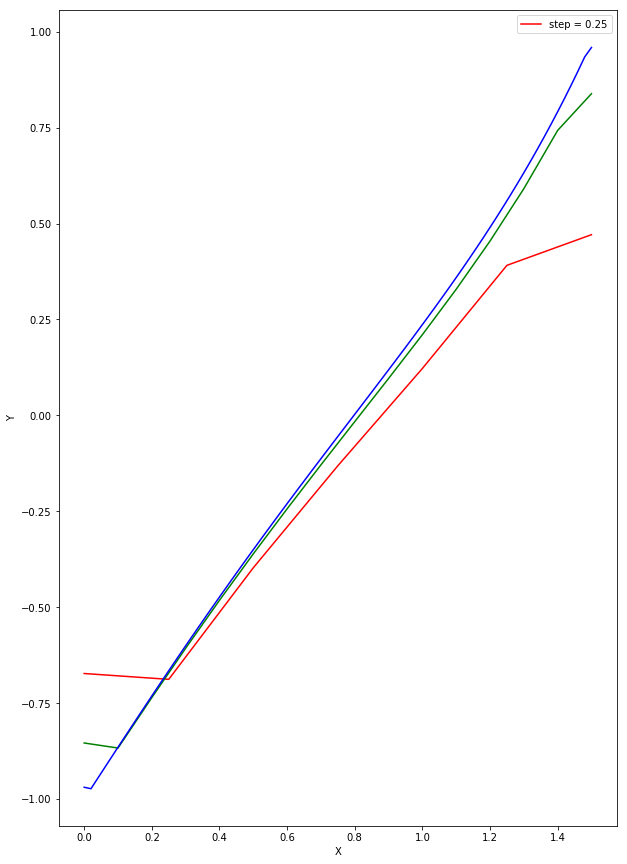

In [15]:
x0 = 0.0
xn = 1.5
steps = [0.25, 0.1, 0.02]
f = lambda xn, x0, step : int(np.ceil((xn-x0)/step))
colors = ['r', 'g', 'b']
lamda = 2
labels = ["step = 0.25"]
# Creating vector that stores the steps
for step in steps:
    y = []
    x_range = func(x0, xn, step)
    print(x_range)
    n = int(np.ceil((xn - x0)/step))
    print(n)
    y[1:n] = TridiagonalBVP(x0, xn, step, n, lamda)
    print(y)
    y.insert(0, 4 / (2*step + 3) * y[0] - 1 / (2*step + 3) * y[1])
    print(y)
    y.append((4 * y[n-1] - y[n-2] - 2*step) / (3 - 4*step))
    print(y)
    plt.xlabel('X')
    plt.ylabel('Y')
    i = steps.index(step)
    plt.plot( x_range, y, colors[i])
    plt.gca().legend(labels)